In [405]:
import pandas  as pd

In [406]:
import numpy as np

In [407]:
import matplotlib.pyplot as plt

In [408]:
from sklearn.model_selection import train_test_split

In [409]:
import seaborn as sns

In [410]:
%matplotlib inline

In [411]:
train = pd.read_csv("data/train.csv", header = 0)

In [412]:
test = pd.read_csv("data/test.csv", header= 0)

In [413]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [414]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [415]:
train.Embarked = train.Embarked.replace (["C", "Q", "S"], [0, 1, 2])

In [416]:
train["Embarked"].fillna(train.Embarked.mean(), inplace=True)

In [417]:
train.Sex = train.Sex.replace(['male', 'female'], [0, 1])

In [418]:
train["Age"].fillna(train.Age.mean(), inplace=True)

In [419]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,2.0
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,2.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,0.0


In [420]:
corrmat = train.corr()

In [421]:
corrmat

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013133
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.169411
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.164226
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,-0.110092
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.028819
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,0.068882
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,0.040438
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,-0.226075
Embarked,0.013133,-0.169411,0.164226,-0.110092,-0.028819,0.068882,0.040438,-0.226075,1.000000


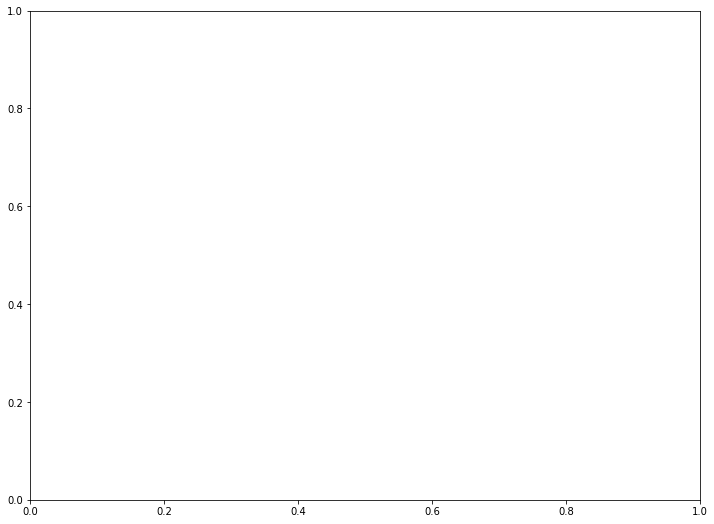

In [422]:
f, ax = plt.subplots(figsize=(12, 9))

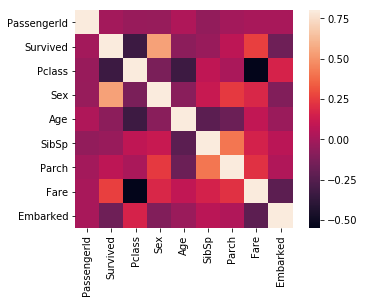

In [423]:
sns.heatmap(corrmat, vmax=0.8, square=True)

In [424]:
split_data = []

In [425]:
for survived in [0,1]:
    split_data.append(train[train.Survived == survived])

In [426]:
split_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 4              5         0       3   
 5              6         0       3   
 6              7         0       1   
 7              8         0       3   
 12            13         0       3   
 13            14         0       3   
 14            15         0       3   
 16            17         0       3   
 18            19         0       3   
 20            21         0       2   
 24            25         0       3   
 26            27         0       3   
 27            28         0       1   
 29            30         0       3   
 30            31         0       1   
 33            34         0       2   
 34            35         0       1   
 35            36         0       1   
 37            38         0       3   
 38            39         0       3   
 40            41         0       3   
 41            42         0       2   
 42            43         0       3   
 45            46        

In [427]:
temp = [i["Pclass"].dropna() for i in split_data]

In [428]:
print(temp)

[0      3
4      3
5      3
6      1
7      3
12     3
13     3
14     3
16     3
18     3
20     2
24     3
26     3
27     1
29     3
30     1
33     2
34     1
35     1
37     3
38     3
40     3
41     2
42     3
45     3
46     3
48     3
49     3
50     3
51     3
      ..
844    3
845    3
846    3
847    3
848    2
850    3
851    3
852    3
854    2
859    3
860    3
861    2
863    3
864    2
867    1
868    3
870    3
872    1
873    3
876    3
877    3
878    3
881    3
882    3
883    2
884    3
885    3
886    2
888    3
890    3
Name: Pclass, Length: 549, dtype: int64, 1      1
2      3
3      1
8      3
9      2
10     3
11     1
15     2
17     2
19     3
21     2
22     3
23     1
25     3
28     3
31     1
32     3
36     3
39     3
43     2
44     3
47     3
52     1
53     2
55     1
56     2
58     2
61     1
65     3
66     2
      ..
809    1
820    1
821    3
823    3
827    2
828    3
829    1
830    3
831    2
835    1
838    3
839    1
842    1
849    1
853 

/Users/yamadahikaru/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


([array([  80.,   97.,  372.]), array([ 216.,  184.,  491.])],
 array([ 1.        ,  1.66666667,  2.33333333,  3.        ]),
 <a list of 2 Lists of Patches objects>)

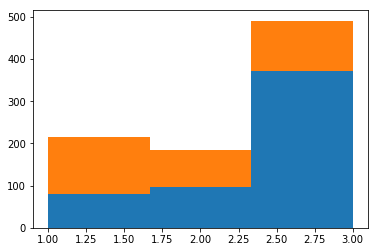

In [429]:
plt.hist(temp, histtype="barstacked", bins=3)

In [430]:
plt.show()

In [431]:
temp = [i["Age"].dropna() for i in split_data]

/Users/yamadahikaru/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


([array([  13.,   13.,    8.,   63.,   80.,  191.,   47.,   39.,   30.,
           23.,   14.,   11.,   10.,    3.,    4.,    0.]),
  array([  44.,   20.,   19.,   96.,  122.,  285.,   88.,   67.,   47.,
           39.,   24.,   18.,   14.,    3.,    4.,    1.])],
 array([  0.42   ,   5.39375,  10.3675 ,  15.34125,  20.315  ,  25.28875,
         30.2625 ,  35.23625,  40.21   ,  45.18375,  50.1575 ,  55.13125,
         60.105  ,  65.07875,  70.0525 ,  75.02625,  80.     ]),
 <a list of 2 Lists of Patches objects>)

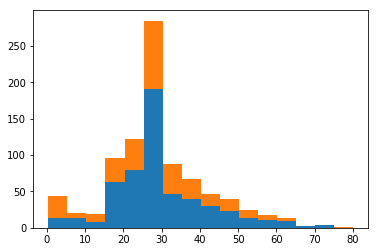

In [432]:
plt.hist(temp, histtype="barstacked", bins=16)

In [433]:
plt.show()

In [435]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,2.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,0.0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,2.0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,2.0,1
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,1.0,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,2.0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,2.0,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,2.0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,0.0,2


In [436]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked       float64
Familysize       int64
dtype: object

In [437]:
train = train.replace("male", 0).replace("female", 1)

In [438]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked       float64
Familysize       int64
dtype: object

In [439]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,2.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,0.0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,2.0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,2.0,1
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,1.0,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,2.0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,2.0,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,2.0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,0.0,2


In [440]:
corrmat = train.corr()

In [441]:
corrmat

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013133,-0.040143
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.169411,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.164226,0.065997
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,-0.110092,0.200988
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.028819,-0.248512
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,0.068882,0.890712
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,0.040438,0.783111
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,-0.226075,0.217138
Embarked,0.013133,-0.169411,0.164226,-0.110092,-0.028819,0.068882,0.040438,-0.226075,1.000000,0.067281
Familysize,-0.040143,0.016639,0.065997,0.200988,-0.248512,0.890712,0.783111,0.217138,0.067281,1.000000


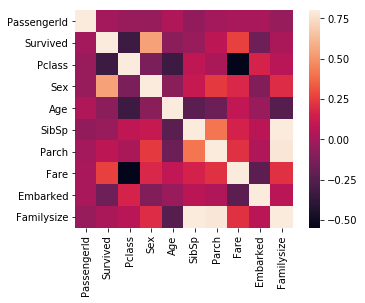

In [442]:
sns.heatmap(corrmat, vmax=0.8, square=True)

In [443]:
combine_salutation = [train]

In [444]:
combine_salutation

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 5              6         0       3   
 6              7         0       1   
 7              8         0       3   
 8              9         1       3   
 9             10         1       2   
 10            11         1       3   
 11            12         1       1   
 12            13         0       3   
 13            14         0       3   
 14            15         0       3   
 15            16         1       2   
 16            17         0       3   
 17            18         1       2   
 18            19         0       3   
 19            20         1       3   
 20            21         0       2   
 21            22         1       2   
 22            23         1       3   
 23            24         1       1   
 24            25        

In [445]:
for train in combine_salutation: 
        train['Salutation'] = train.Name.str.extract(' ([A-Za-z]+).', expand=False) 
for train in combine_salutation: 
        train['Salutation'] = train['Salutation'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        train['Salutation'] = train['Salutation'].replace('Mlle', 'Miss')
        train['Salutation'] = train['Salutation'].replace('Ms', 'Miss')
        train['Salutation'] = train['Salutation'].replace('Mme', 'Mrs')
        del train['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 
for train in combine_salutation: 
        train['Salutation'] = train['Salutation'].map(Salutation_mapping) 
        train['Salutation'] = train['Salutation'].fillna(0)

In [446]:
combine_salutation

[     PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch  \
 0              1         0       3    0  22.000000      1      0   
 1              2         1       1    1  38.000000      1      0   
 2              3         1       3    1  26.000000      0      0   
 3              4         1       1    1  35.000000      1      0   
 4              5         0       3    0  35.000000      0      0   
 5              6         0       3    0  29.699118      0      0   
 6              7         0       1    0  54.000000      0      0   
 7              8         0       3    0   2.000000      3      1   
 8              9         1       3    1  27.000000      0      2   
 9             10         1       2    1  14.000000      1      0   
 10            11         1       3    1   4.000000      1      1   
 11            12         1       1    1  58.000000      0      0   
 12            13         0       3    0  20.000000      0      0   
 13            14         0       

In [447]:
combine_tickets = combine_salutation

In [448]:
combine_tickets

[     PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch  \
 0              1         0       3    0  22.000000      1      0   
 1              2         1       1    1  38.000000      1      0   
 2              3         1       3    1  26.000000      0      0   
 3              4         1       1    1  35.000000      1      0   
 4              5         0       3    0  35.000000      0      0   
 5              6         0       3    0  29.699118      0      0   
 6              7         0       1    0  54.000000      0      0   
 7              8         0       3    0   2.000000      3      1   
 8              9         1       3    1  27.000000      0      2   
 9             10         1       2    1  14.000000      1      0   
 10            11         1       3    1   4.000000      1      1   
 11            12         1       1    1  58.000000      0      0   
 12            13         0       3    0  20.000000      0      0   
 13            14         0       

In [449]:
for train in combine_tickets:
    train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])
    train['Ticket_Lett'] = train['Ticket_Lett'].apply(lambda x: str(x)) 
    train['Ticket_Lett'] = np.where((train['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), train['Ticket_Lett'], np.where((train['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0')) 
    train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x)) 
    del train['Ticket'] 
train['Ticket_Lett']=train['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",1).replace("C",2).replace("A",0)


In [450]:
combine_tickets

[     PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch      Fare  \
 0              1         0       3    0  22.000000      1      0    7.2500   
 1              2         1       1    1  38.000000      1      0   71.2833   
 2              3         1       3    1  26.000000      0      0    7.9250   
 3              4         1       1    1  35.000000      1      0   53.1000   
 4              5         0       3    0  35.000000      0      0    8.0500   
 5              6         0       3    0  29.699118      0      0    8.4583   
 6              7         0       1    0  54.000000      0      0   51.8625   
 7              8         0       3    0   2.000000      3      1   21.0750   
 8              9         1       3    1  27.000000      0      2   11.1333   
 9             10         1       2    1  14.000000      1      0   30.0708   
 10            11         1       3    1   4.000000      1      1   16.7000   
 11            12         1       1    1  58.000000 

In [493]:
combine_cabin = combine_tickets

In [494]:
for train in combine_cabin: 
    train['Cabin_Lett'] = train['Cabin'].apply(lambda x: str(x)[0]) 
    train['Cabin_Lett'] = train['Cabin_Lett'].apply(lambda x: str(x)) 
    train['Cabin_Lett'] = np.where((train['Cabin_Lett']).isin([ 'F', 'E', 'D', 'C', 'B', 'A']),train['Cabin_Lett'], np.where((train['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0'))
del train['Cabin'] 
train['Cabin_Lett']=train['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1)

KeyError: 'Cabin'

In [ ]:
train["Familysize"] = train["SibSp"] + train["Parch"] + 1

In [ ]:
train_data = train.values
xs = train_data[:, 2:] # Pclass以降の変数
y  = train_data[:, 1]  # 正解データ

In [455]:
xs

array([[  3.        ,   0.        ,  22.        , ...,   0.        ,
          9.        ,   0.        ],
       [  1.        ,   1.        ,  38.        , ...,   1.        ,
          8.        ,   1.        ],
       [  3.        ,   1.        ,  26.        , ...,   3.        ,
         16.        ,   0.        ],
       ..., 
       [  3.        ,   1.        ,  29.69911765, ...,   0.        ,
         10.        ,   0.        ],
       [  1.        ,   0.        ,  26.        , ...,   1.        ,
          6.        ,   1.        ],
       [  3.        ,   0.        ,  32.        , ...,   3.        ,
          6.        ,   0.        ]])

In [456]:
y

array([ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [457]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [458]:
test['Age'].fillna(train.Age.mean(), inplace = True)

In [459]:
test["Fare"].fillna(train.Fare.mean(), inplace = True)

In [460]:
test.Name = test.Name.replace("male",0).replace("female",1)

In [461]:
test.Embarked = test.Embarked.replace (["C", "Q", "S"], [0, 1, 2])

In [462]:
test.Sex = test.Sex.replace(['male', 'female'], [0, 1])

In [463]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.500000,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.000000,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.000000,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,3101298,12.2875,NaN,2
5,897,3,"Svensson, Mr. Johan Cervin",0,14.000000,0,0,7538,9.2250,NaN,2
6,898,3,"Connolly, Miss. Kate",1,30.000000,0,0,330972,7.6292,NaN,1
7,899,2,"Caldwell, Mr. Albert Francis",0,26.000000,1,1,248738,29.0000,NaN,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.000000,0,0,2657,7.2292,NaN,0
9,901,3,"Davies, Mr. John Samuel",0,21.000000,2,0,A/4 48871,24.1500,NaN,2


In [464]:
combine = [test]
for test in combine:
    test['Salutation'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
for test in combine:
    test['Salutation'] = test['Salutation'].replace(['Lady', 'Countess','Capt', 'Col',\
         'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    test['Salutation'] = test['Salutation'].replace('Mlle', 'Miss')
    test['Salutation'] = test['Salutation'].replace('Ms', 'Miss')
    test['Salutation'] = test['Salutation'].replace('Mme', 'Mrs')
    del test['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for test in combine:
    test['Salutation'] = test['Salutation'].map(Salutation_mapping)
    test['Salutation'] = test['Salutation'].fillna(0)

for test in combine:
        test['Ticket_Lett'] = test['Ticket'].apply(lambda x: str(x)[0])
        test['Ticket_Lett'] = test['Ticket_Lett'].apply(lambda x: str(x))
        test['Ticket_Lett'] = np.where((test['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), test['Ticket_Lett'],
                                   np.where((test['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0', '0'))
        test['Ticket_Len'] = test['Ticket'].apply(lambda x: len(x))
        del test['Ticket']
test['Ticket_Lett']=test['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",1).replace("C",2).replace("A",0) 

for test in combine:
        test['Cabin_Lett'] = test['Cabin'].apply(lambda x: str(x)[0])
        test['Cabin_Lett'] = test['Cabin_Lett'].apply(lambda x: str(x))
        test['Cabin_Lett'] = np.where((test['Cabin_Lett']).isin(['T', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']),test['Cabin_Lett'],
                                   np.where((test['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0','0'))        
        del test['Cabin']
test['Cabin_Lett']=test['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1).replace("G",1) 

test["FamilySize"] = train["SibSp"] + train["Parch"] + 1
    
test_data = test.values
xs_test = test_data[:, 1:]

In [491]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett
0,1,0,3,0,22.0,1,0,7.2500,2.0,2,1.0,0,9,0
1,2,1,1,1,38.0,1,0,71.2833,0.0,2,3.0,1,8,1
2,3,1,3,1,26.0,0,0,7.9250,2.0,1,2.0,3,16,0


In [490]:
test.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett,FamilySize,IsAlone
0,892,3,0,34.5,0,0,7.8292,1,1,3,6,0,2,0
1,893,3,1,47.0,1,0,7.0000,2,3,3,6,0,2,0
2,894,2,0,62.0,0,0,9.6875,1,1,2,6,0,1,1


In [466]:
from sklearn.ensemble import RandomForestClassifier

In [467]:
model = RandomForestClassifier()

In [468]:
model.fit(xs, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [469]:
Y_pred = model.predict(xs_test)

ValueError: Number of features of the model must match the input. Model n_features is 12 and input n_features is 13 

In [340]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett,FamilySize,IsAlone
0,892,3,male,34.500000,0,0,7.8292,Q,1,3,6,0,2,0
1,893,3,female,47.000000,1,0,7.0000,S,3,3,6,0,2,0
2,894,2,male,62.000000,0,0,9.6875,Q,1,2,6,0,1,1
3,895,3,male,27.000000,0,0,8.6625,S,1,3,6,0,2,0
4,896,3,female,22.000000,1,1,12.2875,S,3,3,7,0,1,1
5,897,3,male,14.000000,0,0,9.2250,S,1,0,4,0,1,1
6,898,3,female,30.000000,0,0,7.6292,Q,2,3,6,0,1,1
7,899,2,male,26.000000,1,1,29.0000,S,1,2,6,0,5,0
8,900,3,female,18.000000,0,0,7.2292,C,3,2,4,0,3,0
9,901,3,male,21.000000,2,0,24.1500,S,1,0,9,0,2,0


In [273]:
xs_test

array([[3, 'male', 34.5, ..., 0, 2, 0],
       [3, 'female', 47.0, ..., 0, 2, 0],
       [2, 'male', 62.0, ..., 0, 1, 1],
       ..., 
       [3, 'male', 38.5, ..., 0, 1, 1],
       [3, 'male', 29.699117647058763, ..., 0, 3, 0],
       [3, 'male', 29.699117647058763, ..., 0, 3, 0]], dtype=object)

In [146]:
train_labels = df["Survived"].values

NameError: name 'df' is not defined

In [147]:
train_labels

NameError: name 'train_labels' is not defined

In [487]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Familysize
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,1
6,0,1,0,54.0,0,0,51.8625,1
7,0,3,0,2.0,3,1,21.0750,5
8,1,3,1,27.0,0,2,11.1333,3
9,1,2,1,14.0,1,0,30.0708,2
10,1,3,1,4.0,1,1,16.7000,3


In [488]:
train_features = df.values[:, 1:]

In [489]:
train_features[0]

array([  3.  ,   0.  ,  22.  ,   1.  ,   0.  ,   7.25,   2.  ])

In [490]:
train_features.dtype

dtype('float64')

In [491]:
from sklearn import svm

In [492]:
model = svm.LinearSVC()

In [493]:
train_labels

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1,

In [494]:
train_features[0]

array([  3.  ,   0.  ,  22.  ,   1.  ,   0.  ,   7.25,   2.  ])

In [495]:
train_labels[0]

0

In [496]:
model.fit(train_features, train_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [497]:
train_features.shape

(714, 7)

In [531]:
test_df = test_df.replace("male",0).replace("female",1)

In [532]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S


In [533]:
test_df["Familysize"] = test_df["SibSp"] + test_df["Parch"] + 1

In [534]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,3
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S,1
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S,3
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S,3


In [535]:
test_df = test_df.drop(["Name", "Cabin", "Embarked", "Ticket"], axis =1)

In [536]:
test_df.dropna(subset=["Age"])

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Familysize
0,892,3,0,34.5,0,0,7.8292,1
1,893,3,1,47.0,1,0,7.0000,2
2,894,2,0,62.0,0,0,9.6875,1
3,895,3,0,27.0,0,0,8.6625,1
4,896,3,1,22.0,1,1,12.2875,3
5,897,3,0,14.0,0,0,9.2250,1
6,898,3,1,30.0,0,0,7.6292,1
7,899,2,0,26.0,1,1,29.0000,3
8,900,3,1,18.0,0,0,7.2292,1
9,901,3,0,21.0,2,0,24.1500,3


In [537]:
ids = test_df["PassengerId"].values

In [538]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Familysize       int64
dtype: object

In [543]:
test_df.drop(['PassengerId'], axis=1, inplace=True)

In [544]:
test_features = test_df.values.astype(np.int64)

In [545]:
test_features

array([[                   3,                    0,                   34,
        ...,                    0,                    7,
                           1],
       [                   3,                    1,                   47,
        ...,                    0,                    7,
                           2],
       [                   2,                    0,                   62,
        ...,                    0,                    9,
                           1],
       ..., 
       [                   3,                    0,                   38,
        ...,                    0,                    7,
                           1],
       [                   3,                    0, -9223372036854775808,
        ...,                    0,                    8,
                           1],
       [                   3,                    0, -9223372036854775808,
        ...,                    1,                   22,
                           3]])

In [546]:
output = model.predict(test_features)

In [547]:
output

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0,

In [548]:
df_out = pd.read_csv("data/test.csv")

In [549]:
df_out["Survived"] = output

In [550]:
df_out

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [551]:
submit_file = open("titanic_submit.csv", "w")

In [552]:
import csv as csv

In [553]:
file_object = csv.writer(submit_file)

In [554]:
file_object.writerow(["PassengerId", "Survived"])

22

In [555]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Familysize
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,2
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,3
5,3,0,14.0,0,0,9.2250,1
6,3,1,30.0,0,0,7.6292,1
7,2,0,26.0,1,1,29.0000,3
8,3,1,18.0,0,0,7.2292,1
9,3,0,21.0,2,0,24.1500,3


In [556]:
file_object.writerows(zip(ids, output))

In [557]:
submit_file.close()

NameError: name 'df' is not defined